# 데이터 분석 예시 (titanic)

Pandas, Matplotlib, Seaborn에 대한 간단한 소개


_INSANE1217, 2024/05/03_

## 1. Pandas 데이터 정제(Data Munging)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic-train.csv")

## 확인

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 인덱싱

In [6]:
df.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [7]:
df.iloc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                    35.0
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [8]:
df.loc[0:4,'Ticket']

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [9]:
df['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

## 선택(Selections)

In [10]:
df[df.Age>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [11]:
df[(df.Age==11)&(df.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S


In [12]:
df[(df.Age==11)|(df.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S


## 고유 요소(Distinct Elements)

In [13]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## 기초 통계

In [15]:
print (df['Age'].mean())
print (df['Fare'].median())
print ((df['Sex'] == 'female').sum())

29.69911764705882
14.4542
314


## 결측치(Missing Data)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df['Age'].fillna(30)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## 그룹화(Groupby)

In [18]:
# Find average age of passengers that survived vs. died
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

## 피벗 테이블(Pivot Tables)

In [19]:
df.pivot_table(index='Sex', columns='Parch', values='Survived', aggfunc='sum')

Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,153.0,46.0,30.0,3.0,0.0,1.0,0.0
male,80.0,19.0,10.0,0.0,0.0,0.0,NaN


In [20]:
df.pivot_table(index='Sex', columns='SibSp', values='Survived', aggfunc='sum')

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,137,80,10,4,2,0,0
male,73,32,3,0,1,0,0


## 연습문제:

- 사망한 승객을 선택하라
- 요금이 40.000 미만이고 3등석이었던 승객을 선택하라
- 승객 ID 674의 이름을 찾아라
- 생존자와 사망자의 수를 세어라
- 성별별로 생존자와 사망자의 수를 세어라
- 생존자와 사망자가 지불한 평균 요금을 계산하라

In [21]:
df.groupby(['Sex', 'Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

## 2. 데이터 시각화

<Axes: >

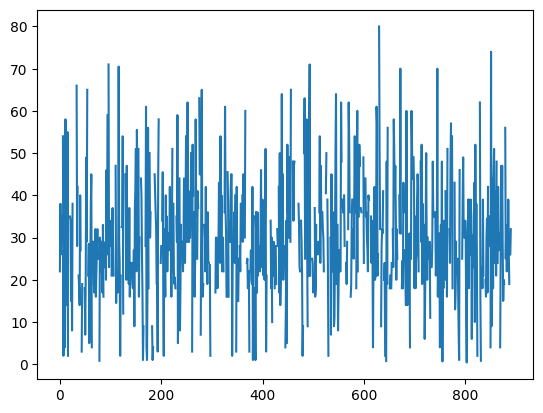

In [22]:
df.Age.plot()

제목을 추가하고 글꼴 크기를 키워 보자

Text(0.5, 1.0, 'Line Plot')

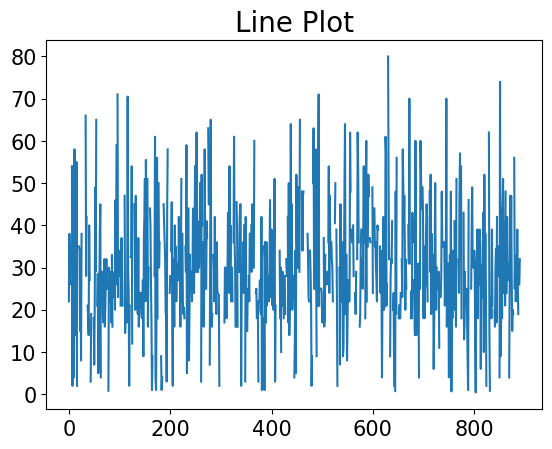

In [23]:
df.Age.plot(fontsize=15)
plt.title('Line Plot', size=20)

데이터 포인트들을 직접 시각화하려면 어떻게 할까?

Text(0.5, 1.0, 'Point Plot')

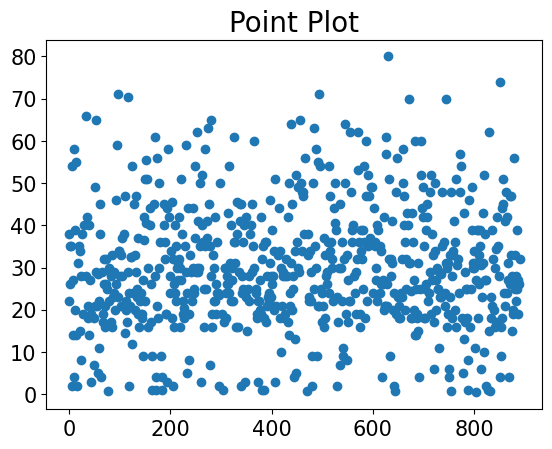

In [24]:
df.Age.plot(style='o', fontsize=15)
plt.title('Point Plot', size=20)

이 데이터의 분포를 살펴보는 건 어떨까?

Text(0.5, 1.0, 'Histogram')

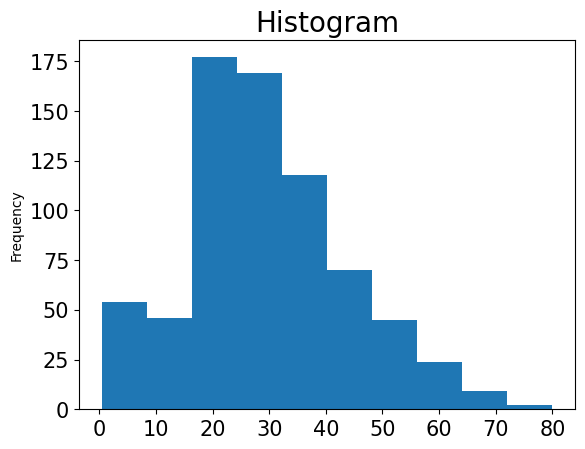

In [25]:
df.Age.plot(kind='hist', fontsize=15)
plt.title('Histogram', size=20)

다양한 플롯 유형은 다음과 같다:
    - 'line' : 선 그래프 (기본값)
    - 'bar' : 세로 막대 그래프
    - 'barh' : 가로 막대 그래프
    - 'hist' : 히스토그램
    - 'box' : 박스플롯
    - 'kde' : 커널 밀도 추정 그래프
    - 'density' : 'kde'와 동일
    - 'area' : 영역 그래프
    - 'pie' : 원형 그래프

밀도 그래프(density plot)나 박스플롯(box plot)을 그려보고 결과를 확인해보자.

## 연습문제:
- 타이타닉 승객들의 나이 분포 히스토그램을 그려라
- 생존자 비율을 원형 그래프로 표현하라
- 사망자와 생존자 하위 집단의 나이 분포 히스토그램을 같은 그래프에 그려라
- 남성과 여성 하위 집단의 나이 분포 히스토그램을 같은 그래프에 그려라
- 승선 항구별로 막대그래프를 그려라

## 3. Seaborn을 활용한 더 예쁜 그래프

Text(0.5, 0, 'Age')

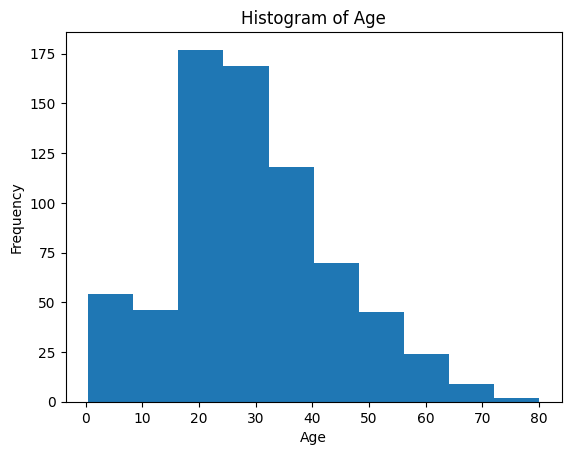

In [4]:
import seaborn as sns
df['Age'].plot(kind='hist')
plt.title('Histogram of Age')
plt.xlabel('Age')

여러 변수가 생존에 미치는 영향을 보고 싶다면 어떻게 할까?

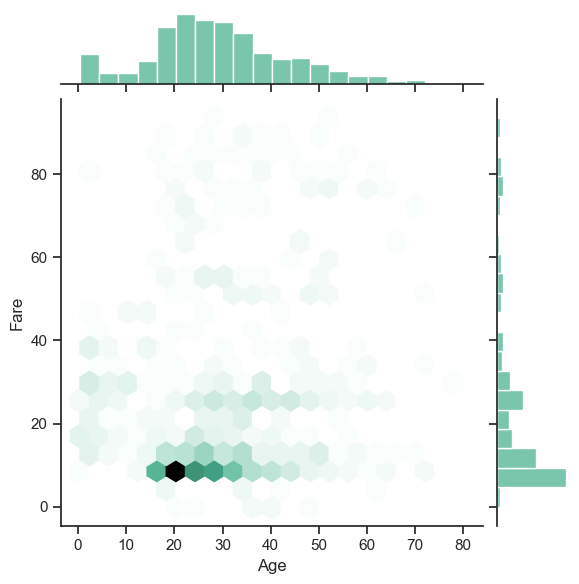

In [29]:
sns.set(style="ticks")
sns.jointplot(data=df[df['Fare'] < 100], x="Age", y="Fare", kind="hex", color="#4CB391")
plt.show()

### Hexbin Plot 해석
- 육각형이 진할수록 해당 구간(Age, Fare)에 많은 승객이 몰려 있음을 의미합니다.
- **20대 초반 승객, 요금 10~20 사이** 구간이 가장 진하게 나타남 → 젊은 층이 저렴한 3등석에 집중.
- 나이와 요금 사이에 뚜렷한 선형 상관관계는 없음.
- 다만 고가(40~80 파운드) 구간에도 일부 승객이 존재하나 소수임.
- 위쪽/오른쪽 히스토그램으로 볼 때, 전체적으로 나이 분포는 20세 전후가 많고, 요금 분포는 10~20대 구간이 중심임.

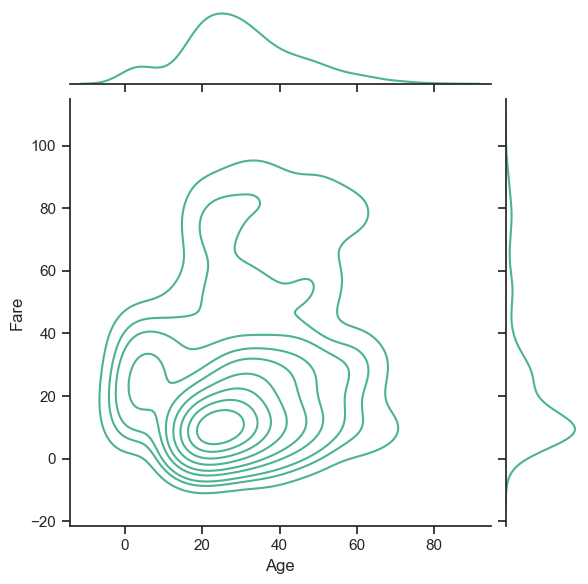

In [31]:
sns.jointplot(data=df[df['Fare'] < 100], x="Age", y="Fare", kind="kde", color="#4CB391")
plt.show()

### KDE Plot 해석
- 등고선이 진할수록 Age-Fare 조합에서 데이터 밀도가 높음을 의미합니다.
- Hexbin과 마찬가지로 **20세 전후, 10~20 파운드** 구간이 가장 밀집.
- KDE는 육각형 대신 부드러운 곡선으로 분포를 표현하기 때문에, 데이터가 이어진 흐름처럼 보임.
- Age에 따른 Fare의 뚜렷한 증가/감소 패턴은 없지만, 젊은 연령대에서 저렴한 요금대가 주류임을 재차 확인 가능.
- 따라서 KDE는 승객 특성이 연속적 분포를 따른다는 점을 강조하며, Hexbin은 국소적 밀집 정도를 더 직관적으로 보여줌.

<Axes: xlabel='Sex', ylabel='Age'>

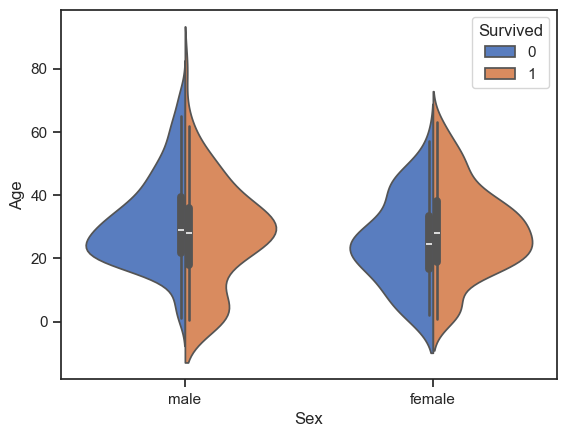

In [32]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, palette="muted", split=True)

## 연습문제:
- [Seaborn 갤러리](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html)를 탐색하고 다른 그래프 유형을 시도해보라.

저작권 © Francesco Mosconi & Dataweekends.com

## 연습문제 풀이 (Titanic 데이터)

아래 코드는 `titanic-train.csv`를 사용하여 각 연습문제의 답을 재현합니다.

In [3]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 노트북 내에서 그래프 표시
# (python_user_visible 환경에서는 자동 렌더됩니다)
df = pd.read_csv(r"titanic-train.csv")

# 컬럼명 확인 (캐글 기본 형식 가정)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 1) 사망한 승객 선택

In [34]:
# 생존 여부 컬럼이 'Survived' (0=사망, 1=생존)임을 가정
died = df[df['Survived'] == 0]
died.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


### 2) 요금이 40 미만이고 3등석이었던 승객 선택

In [35]:
cheap_third = df[(df['Fare'] < 40) & (df['Pclass'] == 3)]
cheap_third[['PassengerId','Pclass','Fare','Name']].head(10)

,PassengerId,Pclass,Fare,Name
0,1,3,7.2500,"Braund, Mr. Owen Harris"
2,3,3,7.9250,"Heikkinen, Miss. Laina"
4,5,3,8.0500,"Allen, Mr. William Henry"
5,6,3,8.4583,"Moran, Mr. James"
7,8,3,21.0750,"Palsson, Master. Gosta Leonard"
8,9,3,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
10,11,3,16.7000,"Sandstrom, Miss. Marguerite Rut"
12,13,3,8.0500,"Saundercock, Mr. William Henry"
13,14,3,31.2750,"Andersson, Mr. Anders Johan"
14,15,3,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina"


### 3) 승객 ID 674의 이름 찾기

In [36]:
row_674 = df.loc[df['PassengerId'] == 674, ['PassengerId','Name']]
row_674

,PassengerId,Name
673,674,"Wilhelms, Mr. Charles"


### 4) 생존자 수와 사망자 수 세기

In [37]:
count_survival = df['Survived'].value_counts().rename(index={0:'Died(0)', 1:'Survived(1)'})
count_survival

Survived
Died(0)        549
Survived(1)    342
Name: count, dtype: int64

### 5) 성별별로 생존자/사망자 수 세기

In [38]:
gender_survival = df.groupby(['Sex','Survived'])['PassengerId'].count().unstack(fill_value=0)
gender_survival

Survived,0,1
Sex,,
female,81,233
male,468,109


### 6) 생존자/사망자 평균 요금 계산

In [39]:
avg_fare_by_survival = df.groupby('Survived')['Fare'].mean()
avg_fare_by_survival

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

### 7) 전체 승객 나이 히스토그램

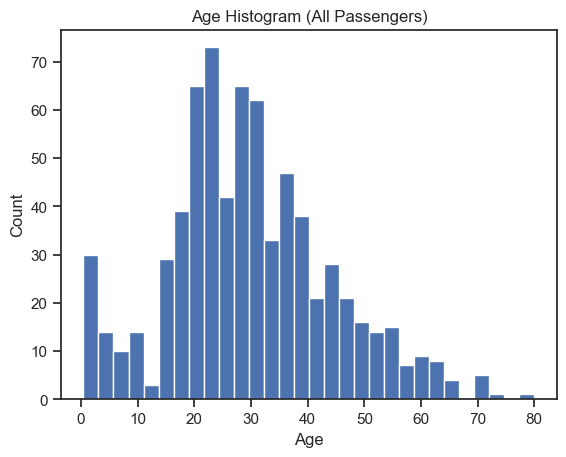

In [40]:
# 주의: python_user_visible 규칙에 따라 seaborn 미사용, 한 그래프당 하나의 플롯, 색상 지정하지 않음
plt.figure()
df['Age'].dropna().plot(kind='hist', bins=30)
plt.title('Age Histogram (All Passengers)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 8) 생존 비율 파이 차트

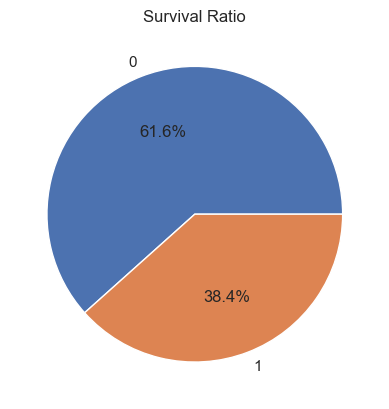

In [41]:
plt.figure()
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Survival Ratio')
plt.ylabel('')
plt.show()

### 9) 사망/생존 하위 집단의 나이 히스토그램 (같은 플롯)

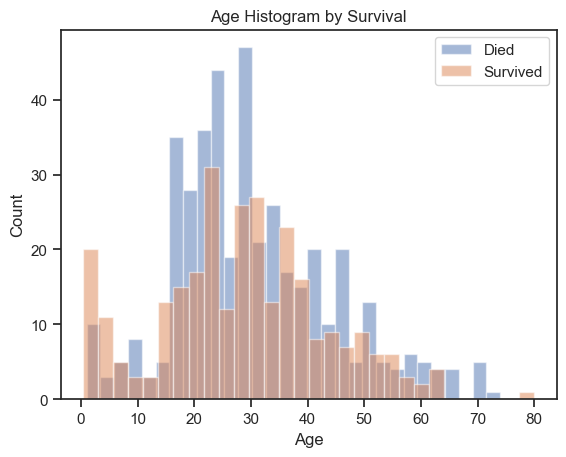

In [42]:
plt.figure()
df[df['Survived']==0]['Age'].dropna().plot(kind='hist', bins=30, alpha=0.5, label='Died')
df[df['Survived']==1]['Age'].dropna().plot(kind='hist', bins=30, alpha=0.5, label='Survived')
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

### 10) 남성/여성 하위 집단의 나이 히스토그램 (같은 플롯)

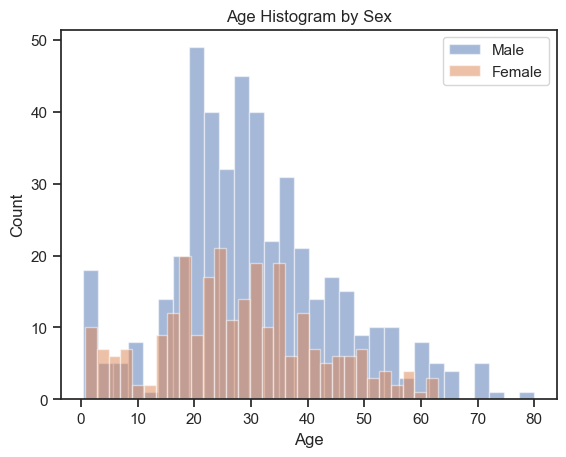

In [43]:
plt.figure()
df[df['Sex']=='male']['Age'].dropna().plot(kind='hist', bins=30, alpha=0.5, label='Male')
df[df['Sex']=='female']['Age'].dropna().plot(kind='hist', bins=30, alpha=0.5, label='Female')
plt.title('Age Histogram by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

### 11) 승선 항구별 막대 그래프 (Embarked)

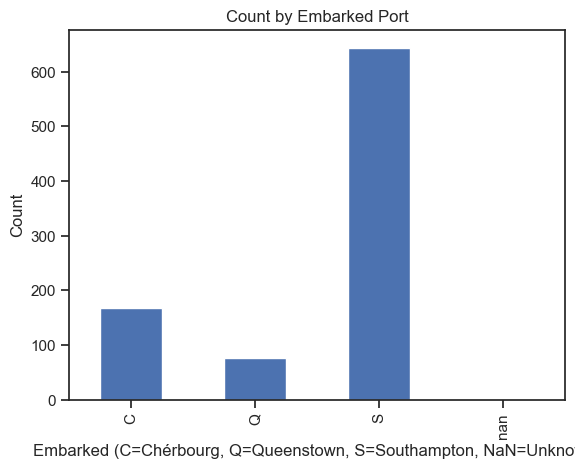

In [44]:
plt.figure()
df['Embarked'].value_counts(dropna=False).sort_index().plot(kind='bar')
plt.title('Count by Embarked Port')
plt.xlabel('Embarked (C=Chérbourg, Q=Queenstown, S=Southampton, NaN=Unknown)')
plt.ylabel('Count')
plt.show()

### 12) (선택) Seaborn 갤러리 응용
본 노트북 규칙상 `matplotlib`만 사용했지만, 추가 학습 시 Seaborn의 다양한 플롯을 시도해 보세요.

## 가설 검증 예시
**가설:** 선실 등급(Pclass)이 높을수록 생존 확률이 높다.

이제 Titanic 데이터를 이용하여 이 가설을 검증해 보겠습니다.

C:\Users\dldnj\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dldnj\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


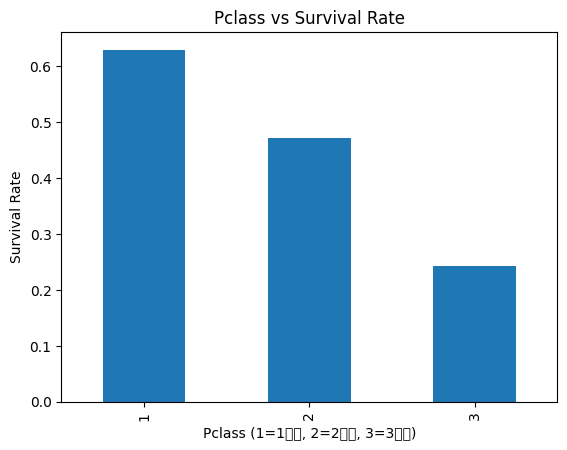

In [5]:
# 설명: 등급(Pclass)별 평균 생존률을 계산하고 막대그래프로 시각화합니다.
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()

plt.figure()
survival_rate_by_class.plot(kind='bar')
plt.title('Pclass vs Survival Rate')
plt.xlabel('Pclass (1=1등석, 2=2등석, 3=3등석)')
plt.ylabel('Survival Rate')
plt.show()

### 해석
- 그래프에서 1등석(Pclass=1)의 생존률이 가장 높고, 3등석(Pclass=3)의 생존률이 가장 낮게 나타납니다.
- 이는 **등급이 높을수록 생존 확률이 높다**는 가설을 뒷받침합니다.
- 실제로 Titanic 사고 당시 상류층 승객들이 먼저 구출될 수 있었음을 데이터로 확인할 수 있습니다.

👉 **변수 간 관계에 대한 가설을 세우고, 시각화를 통해 검증**